In [ ]:
# Importing library

In [408]:
import os
import librosa
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [409]:
#Preprocessing

In [410]:
def extract_mfcc(audio_path, max_pad_len=100):
    audio, sr = librosa.load(audio_path, mono=True)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    pad_width = max_pad_len - mfccs.shape[1]
    
    # Ensure pad_width is n
    if pad_width < 0:
        mfccs = mfccs[:, :max_pad_len]
    else:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0,pad_width)), mode='constant')
    
    return mfccs

def load_data(data_dir):
    labels = []
    mfccs = []
    max_pad_len = 0
    
    for label, folder in enumerate(os.listdir(data_dir)):
        for filename in os.listdir(os.path.join(data_dir, folder)):
            if filename.endswith(".wav") or filename.endswith(".mp3") :
                audio_path = os.path.join(data_dir, folder, filename)
                mfcc = extract_mfcc(audio_path)
                mfccs.append(mfcc)
                labels.append(label)
                
                if mfcc.shape[1] > max_pad_len:
                    max_pad_len = mfcc.shape[1]
    
    return np.array(mfccs), np.array(labels)

In [411]:
data_dir = "D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\Audio_Classification\\data"

In [412]:
#Load Data

In [413]:
X, y = load_data(data_dir)

In [414]:
#Split and Encode data

In [415]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [416]:
#Display Audio

In [417]:
#Build Neaural Network

In [418]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization

model = Sequential()
input_shape = (X.shape[1], X.shape[2])  
model.add(Conv1D(32, 3, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=np.max(y) + 1, activation='softmax'))

In [419]:
#RUN Nuetwork

In [420]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [421]:
#Trainig model

In [422]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
12/12 [==============================] - 3s 38ms/step - loss: 0.6018 - accuracy: 0.7445 - val_loss: 1.8619 - val_accuracy: 0.6319
Epoch 2/20
12/12 [==============================] - 0s 12ms/step - loss: 0.2976 - accuracy: 0.8929 - val_loss: 0.7392 - val_accuracy: 0.7363
Epoch 3/20
12/12 [==============================] - 0s 11ms/step - loss: 0.1739 - accuracy: 0.9560 - val_loss: 0.6435 - val_accuracy: 0.7582
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss: 0.1073 - accuracy: 0.9739 - val_loss: 0.5659 - val_accuracy: 0.7857
Epoch 5/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0770 - accuracy: 0.9780 - val_loss: 0.4428 - val_accuracy: 0.8242
Epoch 6/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0577 - accuracy: 0.9849 - val_loss: 0.3961 - val_accuracy: 0.8352
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0418 - accuracy: 0.9945 - val_loss: 0.2954 - val_accuracy: 0.8791
Epoch 8/20
12

In [423]:
#Evaluting model

In [424]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

6/6 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9725
Test accuracy: 97.25%


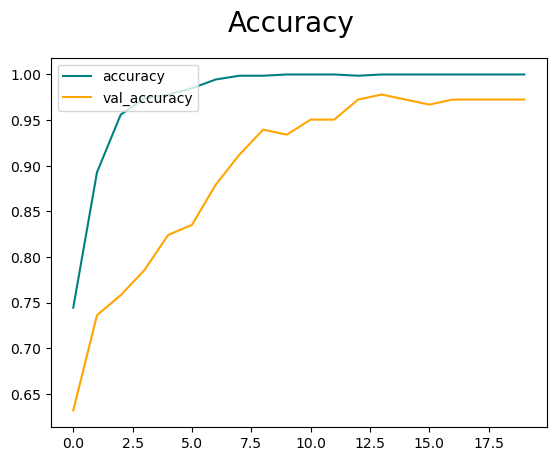

In [425]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

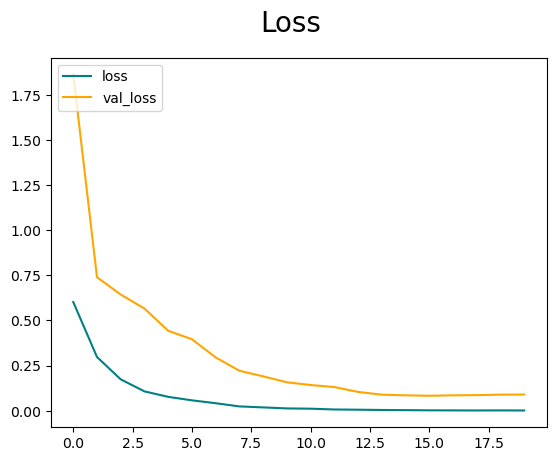

In [426]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [427]:
file_path = "D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\speech _Recognition\\Audio_Classification\\data\\Forest Recordings\\recording_94.mp3"
test_mfcc = extract_mfcc(file_path)
test_mfcc = np.expand_dims(test_mfcc, axis=0) 
predicted_class = np.argmax(model.predict(test_mfcc))
class_labels = ['Forest Recordings', 'Parsed_Capuchinbird_Clips', 'Parsed_Not_Capuchinbird_Clips']
predicted_label = class_labels[predicted_class]

print(f"The predicted class is: {predicted_label}")

1/1 [==============================] - 0s 141ms/step
The predicted class is: Forest Recordings


In [428]:
model.save('audio.model')

INFO:tensorflow:Assets written to: audio.model\assets


INFO:tensorflow:Assets written to: audio.model\assets
